In [1]:
import numpy as np
import pandas as pd
#from pandas_profiling import ProfileReport
import glob
from datetime import datetime
import time
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_squared_error,median_absolute_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt

import numpy as np
from itertools import combinations 
%matplotlib inline

<h2> load data </h2>

In [2]:
# Load states data
state_data = pd.DataFrame()

# Insert relevant path here
state_csv = 'state.csv'
#state_csv = '/content/gdrive/My Drive/overall-state.csv'
state_data = pd.read_csv(state_csv, low_memory=False)
state_data.head()

,date,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,...,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
0,2020-04-06,ak,female,18-34,119,78755.310877,0.8772,0.8772,2.6316,0.8403,...,3.1304,0.0000,0.0000,7.1685,28.7123,0.0000,0.0000,9.3777,63.1666,10.3406
1,2020-04-06,ak,female,35-54,95,63666.933392,3.2258,3.2258,3.2258,3.1579,...,9.7745,2.8142,6.9796,33.3235,29.5650,1.4395,0.0000,11.1606,46.8402,25.1121
2,2020-04-06,ak,female,55+,51,52710.069695,0.0000,0.0000,1.9608,0.0000,...,6.9947,19.3862,1.9712,26.1060,18.2128,6.3439,0.0000,8.1722,35.4451,22.9556
3,2020-04-06,al,female,18-34,478,480481.152573,0.8547,1.0684,2.1368,1.6771,...,3.1854,0.1110,1.1657,10.9676,21.6862,0.4720,1.5429,5.4713,62.7683,6.3179
4,2020-04-06,al,female,35-54,482,557081.407562,1.4706,1.6807,2.3109,2.2869,...,12.1389,3.1155,5.4066,34.8936,14.9863,5.8535,2.2455,14.0900,42.6328,24.1615


In [3]:
state_data_dropped = state_data.dropna()#na values dropped
state_data_dropped.head()

,date,state_code,gender,age_bucket,n,weight_sums,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,...,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
2350,2020-04-16,al,female,18-34,145,462802.973425,0.0000,0.0000,2.0979,0.6897,...,3.9268,0.3763,2.2387,9.1461,14.0375,0.0000,0.0000,3.1909,70.0717,2.2785
2351,2020-04-16,al,female,35-54,194,583249.802288,2.0942,2.0942,4.1885,3.1579,...,10.2654,1.4028,3.8820,30.0390,14.9271,5.7298,0.0000,10.6853,49.2702,17.9230
2352,2020-04-16,al,female,55+,163,645561.896600,1.2500,1.2500,3.1250,0.6173,...,21.7870,10.0665,8.4887,59.0565,15.1619,10.5929,4.0285,12.0755,21.7587,40.0636
2353,2020-04-16,al,male,35-54,72,413211.077594,0.0000,0.0000,0.0000,0.0000,...,12.2051,1.4869,1.3766,43.8301,10.7819,5.8744,0.0000,5.8113,44.2455,20.2207
2354,2020-04-16,al,male,55+,86,617698.363860,2.3256,1.1628,2.3256,3.4884,...,23.5848,11.5621,23.2836,58.7448,7.0642,9.1341,2.4027,6.4712,26.2613,44.5437


In [4]:
print (state_data_dropped.shape)# we are not lossing much , we are loosing around 10% of the data

(76790, 104)


In [5]:
state_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76790 entries, 2350 to 83398
Columns: 104 entries, date to pct_multiple_medical_conditions_weighted
dtypes: float64(99), int64(1), object(4)
memory usage: 61.5+ MB


<h2> target variable <h2>

In [6]:
X = state_data_dropped.copy()

y= state_data_dropped['pct_tested_and_positive']
y_male= X[X['gender']=='male']['pct_tested_and_positive']
y_female= X[X['gender']=='female']['pct_tested_and_positive']
y_young= X[X['age_bucket']=='18-34']['pct_tested_and_positive']
y_mid= X[X['age_bucket']=='35-54']['pct_tested_and_positive']
y_old= X[X['age_bucket']=='55+']['pct_tested_and_positive']

<h2> prune features </h2>

In [7]:
output_like_variables=['pct_tested_and_positive','pct_tested_and_negative', 'pct_tested_no_result', 'pct_could_not_get_tested', 'pct_did_not_try_to_get_tested',\
                       'pct_tested_and_positive_weighted','pct_contact_covid_positive', 'pct_contact_covid_positive_weighted' ,\
                       'pct_tested_and_negative_weighted',	'pct_tested_no_result_weighted',	'pct_could_not_get_tested_weighted',	'pct_did_not_try_to_get_tested_weighted'] 
                        
X=X.drop(output_like_variables,axis=1)
X.columns

Index(['date', 'state_code', 'gender', 'age_bucket', 'n', 'weight_sums',
       'pct_cli', 'pct_ili', 'pct_cli_anosmia_ageusia', 'pct_hh_cli',
       'pct_cmnty_cli', 'pct_hh_fever', 'pct_hh_sore_throat', 'pct_hh_cough',
       'pct_hh_shortness_of_breath', 'pct_hh_difficulty_breathing',
       'mean_hh_cli_ct', 'mean_cmnty_cli_ct', 'pct_self_fever',
       'pct_self_cough', 'pct_self_shortness_of_breath',
       'pct_self_difficulty_breathing', 'pct_self_tiredness_or_exhaustion',
       'pct_self_nasal_congestion', 'pct_self_runny_nose',
       'pct_self_muscle_joint_aches', 'pct_self_sore_throat',
       'pct_self_persistent_pain_pressure_in_chest',
       'pct_self_nausea_vomiting', 'pct_self_diarrhea',
       'pct_self_anosmia_ageusia', 'pct_self_other', 'pct_self_none_of_above',
       'pct_self_multiple_symptoms', 'pct_worked_outside_home',
       'pct_avoid_contact_all_or_most_time',
       'mean_outside_hh_contact_at_work_ct',
       'mean_outside_hh_contact_shopping_ct',
     

In [8]:
unweighted=['n','weight_sums','pct_cli','pct_ili', 'pct_cli_anosmia_ageusia',\
        'pct_hh_cli', 'pct_cmnty_cli', 'pct_hh_fever', 'pct_hh_sore_throat',\
         'pct_hh_cough', 'pct_hh_shortness_of_breath','pct_hh_difficulty_breathing', 'mean_hh_cli_ct', 'mean_cmnty_cli_ct',\
         'pct_self_fever', 'pct_self_cough', 'pct_self_shortness_of_breath',\
         'pct_self_difficulty_breathing', 'pct_self_tiredness_or_exhaustion',\
         'pct_self_nasal_congestion', 'pct_self_runny_nose',\
         'pct_self_muscle_joint_aches', 'pct_self_sore_throat',
       'pct_self_persistent_pain_pressure_in_chest',\
       'pct_self_nausea_vomiting', 'pct_self_diarrhea',\
       'pct_self_anosmia_ageusia', 'pct_self_other', 'pct_self_none_of_above',\
       'pct_self_multiple_symptoms', 'pct_worked_outside_home',\
       'pct_avoid_contact_all_or_most_time',\
       'mean_outside_hh_contact_at_work_ct',\
       'mean_outside_hh_contact_shopping_ct',\
       'mean_outside_hh_contact_in_social_gatherings_ct', 'pct_diabetes',\
       'pct_cancer', 'pct_heart_disease', 'pct_high_blood_pressure', \
       'pct_asthma', 'pct_chronic_lung_disease', 'pct_kidney_disease',\
       'pct_autoimmune_disorder', 'pct_no_above_medical_conditions',\
       'pct_multiple_medical_conditions', ]
X=X.drop(unweighted,axis=1)
n_features = X.shape[1]
print(n_features)

47


In [9]:
mean_D = ['mean_outside_hh_contact_in_social_gatherings_ct_weighted','mean_cmnty_cli_ct_weighted',\
        'mean_outside_hh_contact_shopping_ct_weighted','mean_outside_hh_contact_at_work_ct_weighted']
X=X.drop(mean_D,axis=1)
n_features = X.shape[1]
print(n_features)

43


In [10]:
derived=['pct_ili_weighted','pct_cli_weighted','pct_cli_anosmia_ageusia_weighted',]
X=X.drop(derived,axis=1)
n_features = X.shape[1]
print(n_features)

40


<h2> create demographic-wise data frames </h2>

In [11]:
X_male=X[X['gender']=='male']
X_female=X[X['gender']=='female']
X_young=X[X['age_bucket']=='18-34']
X_mid=X[X['age_bucket']=='35-54']
X_old=X[X['age_bucket']=='55+']

<h2> drop demographic features </h2>

In [12]:
X=X.drop(['state_code','gender','age_bucket', 'date'],axis=1)
n_features = X.shape[1]
print(n_features)
X.head()

36


,pct_hh_cli_weighted,pct_cmnty_cli_weighted,pct_hh_fever_weighted,pct_hh_sore_throat_weighted,pct_hh_cough_weighted,pct_hh_shortness_of_breath_weighted,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,...,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted
2350,0.5417,28.4427,0.5417,13.2862,29.7366,6.7456,5.9893,0.2042,0.0000,20.8051,...,3.9268,0.3763,2.2387,9.1461,14.0375,0.0000,0.0000,3.1909,70.0717,2.2785
2351,3.3287,22.7135,5.1090,9.1873,17.1283,5.8479,3.6074,243.1850,3.3699,14.6460,...,10.2654,1.4028,3.8820,30.0390,14.9271,5.7298,0.0000,10.6853,49.2702,17.9230
2352,0.7340,11.6848,1.2775,5.2238,18.2007,6.9084,2.6305,0.1186,1.6240,13.8949,...,21.7870,10.0665,8.4887,59.0565,15.1619,10.5929,4.0285,12.0755,21.7587,40.0636
2353,0.0000,15.4023,0.0000,12.3865,20.0326,9.9593,4.6353,0.1451,0.0000,17.0680,...,12.2051,1.4869,1.3766,43.8301,10.7819,5.8744,0.0000,5.8113,44.2455,20.2207
2354,3.0909,7.8796,3.0909,2.0401,15.9014,5.9498,2.6902,450.1713,2.0408,8.3941,...,23.5848,11.5621,23.2836,58.7448,7.0642,9.1341,2.4027,6.4712,26.2613,44.5437


In [13]:
X.columns

Index(['pct_hh_cli_weighted', 'pct_cmnty_cli_weighted',
       'pct_hh_fever_weighted', 'pct_hh_sore_throat_weighted',
       'pct_hh_cough_weighted', 'pct_hh_shortness_of_breath_weighted',
       'pct_hh_difficulty_breathing_weighted', 'mean_hh_cli_ct_weighted',
       'pct_self_fever_weighted', 'pct_self_cough_weighted',
       'pct_self_shortness_of_breath_weighted',
       'pct_self_difficulty_breathing_weighted',
       'pct_self_tiredness_or_exhaustion_weighted',
       'pct_self_nasal_congestion_weighted', 'pct_self_runny_nose_weighted',
       'pct_self_muscle_joint_aches_weighted', 'pct_self_sore_throat_weighted',
       'pct_self_persistent_pain_pressure_in_chest_weighted',
       'pct_self_nausea_vomiting_weighted', 'pct_self_diarrhea_weighted',
       'pct_self_anosmia_ageusia_weighted', 'pct_self_other_weighted',
       'pct_self_none_of_above_weighted',
       'pct_self_multiple_symptoms_weighted',
       'pct_worked_outside_home_weighted',
       'pct_avoid_contact_all_o

In [14]:
X_male=X_male.drop(['state_code','gender','age_bucket', 'date'],axis=1)
X_female=X_female.drop(['state_code','gender','age_bucket', 'date'],axis=1)
X_young=X_young.drop(['state_code','gender','age_bucket', 'date'],axis=1)
X_mid=X_mid.drop(['state_code','gender','age_bucket', 'date'],axis=1)
X_old=X_old.drop(['state_code','gender','age_bucket', 'date'],axis=1)


please note that the results of this code might be slighlty different than the results reported in the paper due to random state

<h2> Entire data : feature ranking, n_features vs error</h2>

In [15]:
features=[]
X_copy=X.copy()
for _ in range(n_features):
    X_reg_new = SelectKBest(score_func=f_regression, k=1).fit_transform(X_copy,y)
    to_comp = np.squeeze(X_reg_new)
    cols = X.columns
    for c in cols:
        cur_col=np.array(X[c])
        if np.allclose(to_comp,cur_col):
            selected_feature=c
            features.append(selected_feature)
            print (selected_feature,f_regression(X[[selected_feature]],y)[0])
    X_copy=X_copy.drop(selected_feature,axis=1)

pct_cmnty_cli_weighted [14938.48816456]
pct_self_anosmia_ageusia_weighted [9498.89229794]
pct_hh_cli_weighted [6050.88250153]
pct_hh_fever_weighted [5490.15612527]
pct_self_fever_weighted [4388.95759983]
pct_hh_sore_throat_weighted [1787.42269067]
pct_avoid_contact_all_or_most_time_weighted [1494.25038393]
pct_hh_difficulty_breathing_weighted [1330.48793481]
pct_self_persistent_pain_pressure_in_chest_weighted [1257.78331468]
pct_self_runny_nose_weighted [1084.84412662]
pct_worked_outside_home_weighted [1023.50285601]
pct_self_nausea_vomiting_weighted [1016.94758914]
pct_hh_shortness_of_breath_weighted [1004.67944587]
pct_self_sore_throat_weighted [975.25614266]
pct_self_difficulty_breathing_weighted [723.49150048]
pct_asthma_weighted [466.91243179]
pct_self_shortness_of_breath_weighted [440.88344033]
pct_hh_cough_weighted [322.05679444]
pct_self_none_of_above_weighted [241.72819985]
pct_self_diarrhea_weighted [228.59465358]
pct_chronic_lung_disease_weighted [224.24651285]
pct_cancer_we

In [16]:
gb_rel_errors=[]
gb_abs_errors=[]
for i in range(1,len(features)+1):
    X_train, X_test, y_train, y_test = train_test_split(X[features[:i]], y, test_size=0.2, random_state=42)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    gb_rel_errors.append(rel_error*100)
    gb_abs_errors.append(abs_error)
    print(i,abs_error,rel_error*100)

1 1.3097044321519902 70.83696620451401
2 1.2744905490937342 67.80841495680669
3 1.2662324022686333 67.1597723167108
4 1.2668949125752034 67.19165940293438
5 1.2668978424182762 67.15886604962317
6 1.2345473996327496 65.85896175108597
7 1.2100762049885516 64.35530584228721
8 1.2079035579259378 64.29083013826981
9 1.206732559787575 64.26370649385885
10 1.1697689221257423 61.87972414852448
11 1.1648780009318833 61.670127211067374
12 1.163509150939364 61.57060260824253
13 1.1636581594503803 61.549972884611904
14 1.161014676806029 61.455972138300474
15 1.1607282129330978 61.466508067905934
16 1.1611785253847342 61.5176665409902
17 1.160472498702247 61.48874043074153
18 1.1589490038742734 61.342878313467075
19 1.1439339264105388 60.875132587449635
20 1.143289545741507 60.8599214044199
21 1.1433352434764592 60.83514190297471
22 1.1431051186670065 60.789110494488355
23 1.1430087868835577 60.75753111356642
24 1.1437359283269166 60.84907913962249
25 1.142909142990814 60.824438558173654
26 1.14291

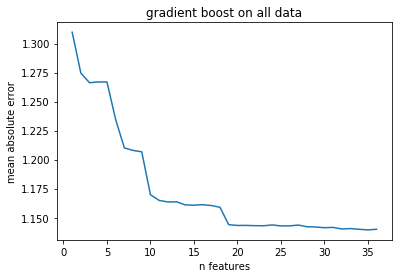

In [17]:
plt.plot(range(1,len(features)+1),gb_abs_errors)
plt.xlabel('n features')
plt.ylabel('mean absolute error')
plt.title('gradient boost on all data')
plt.show()

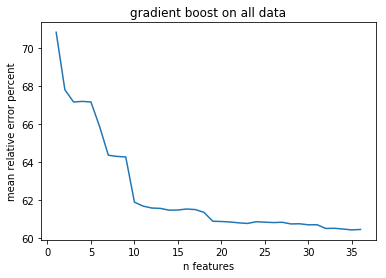

In [18]:
plt.plot(range(1,len(features)+1),gb_rel_errors)
plt.xlabel('n features')
plt.ylabel('mean relative error percent')
plt.title('gradient boost on all data')
plt.show()

<h2> Gender-wise data split: feature ranking, n_features vs error</h2>

In [19]:
male_errors=[]
male_features=[]
X_copy=X_male.copy()
for _ in range(n_features):
    X_reg_new = SelectKBest(score_func=f_regression, k=1).fit_transform(X_copy,y_male)
    to_comp = np.squeeze(X_reg_new)
    cols = X_male.columns
    for c in cols:
        cur_col=np.array(X_male[c])
        if np.allclose(to_comp,cur_col):
            selected_feature=c
            male_features.append(selected_feature)
            print (selected_feature,f_regression(X_male[[selected_feature]],y_male)[0])

    
    X_copy=X_copy.drop(selected_feature,axis=1)

pct_cmnty_cli_weighted [2407.14229475]
pct_self_anosmia_ageusia_weighted [1380.56860526]
pct_hh_cli_weighted [1086.75980345]
pct_hh_fever_weighted [1012.94190041]
pct_self_fever_weighted [859.96872823]
pct_self_runny_nose_weighted [408.77778313]
pct_avoid_contact_all_or_most_time_weighted [296.26286959]
pct_worked_outside_home_weighted [253.57837436]
pct_hh_sore_throat_weighted [212.75853187]
pct_hh_difficulty_breathing_weighted [195.22571486]
pct_self_none_of_above_weighted [181.87446178]
pct_self_nausea_vomiting_weighted [159.75266575]
pct_hh_shortness_of_breath_weighted [126.68894677]
pct_self_persistent_pain_pressure_in_chest_weighted [124.63106422]
pct_self_nasal_congestion_weighted [108.27352384]
pct_asthma_weighted [102.7759214]
pct_self_difficulty_breathing_weighted [93.50802788]
pct_self_sore_throat_weighted [76.66660488]
pct_self_multiple_symptoms_weighted [71.14029889]
pct_self_other_weighted [46.74987607]
pct_self_shortness_of_breath_weighted [39.00815985]
pct_chronic_lung_

1 1.5242267394698474 86.14274769393134
2 1.4851911804780882 82.5818699516567
3 1.4752676839578795 81.90540819786352
4 1.4722757965979658 81.77327877304816
5 1.4732678978502607 82.0212097635695
6 1.4172971684880984 78.86535687394333
7 1.4100821886428176 78.51030670763787
8 1.4074696574528338 78.57755130831593
9 1.4048673736044313 78.44548772731197
10 1.4059336584229165 78.48307965495992
11 1.3891173993315336 77.69737304635825
12 1.389273660641988 77.63803936831977
13 1.3900049226942144 77.6594421557655
14 1.3909258367640152 77.7331359639622
15 1.391354966016801 77.88718800988998
16 1.3911173301795978 77.82461131848811
17 1.3927733933489352 77.90430243189212
18 1.389634735373931 77.6875167525605
19 1.3925121904585793 77.91012170573339
20 1.3950271439592383 78.07380956435473
21 1.3952087583352588 78.11736449224966
22 1.3932414820162962 78.0025604201707
23 1.3954951267377644 78.15919722786585
24 1.3963009298031188 78.28224000815112
25 1.3953957202901828 78.20457413456742
26 1.3930303859759

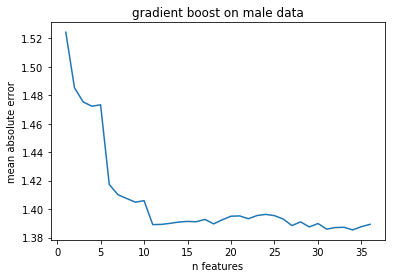

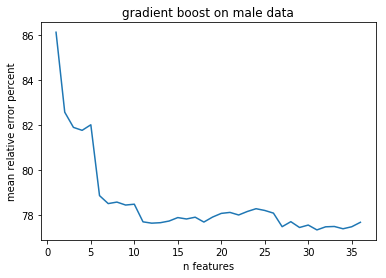

In [20]:
male_gb_rel_errors=[]
male_gb_abs_errors=[]
for i in range(1,len(features)+1):
    X_train, X_test, y_train, y_test = train_test_split(X_male[male_features[:i]], y_male, test_size=0.2, random_state=42)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    male_gb_rel_errors.append(rel_error*100)
    male_gb_abs_errors.append(abs_error)
    print(i,abs_error,rel_error*100)
    
plt.plot(range(1,len(male_features)+1),male_gb_abs_errors)
plt.xlabel('n features')
plt.ylabel('mean absolute error')
plt.title('gradient boost on male data')
plt.show()

plt.plot(range(1,len(male_features)+1),male_gb_rel_errors)
plt.xlabel('n features')
plt.ylabel('mean relative error percent')
plt.title('gradient boost on male data')
plt.show()

In [21]:
female_features=[]
X_copy=X_female.copy()
for _ in range(n_features):
    X_reg_new = SelectKBest(score_func=f_regression, k=1).fit_transform(X_copy,y_female)
    to_comp = np.squeeze(X_reg_new)
    cols = X_female.columns
    for c in cols:
        cur_col=np.array(X_female[c])
        if np.allclose(to_comp,cur_col):
            selected_feature=c
            female_features.append(selected_feature)
            print (selected_feature,f_regression(X_female[[selected_feature]],y_female)[0])

    X_copy=X_copy.drop(selected_feature,axis=1)

pct_cmnty_cli_weighted [6180.94999881]
pct_self_anosmia_ageusia_weighted [4906.29907776]
pct_hh_cli_weighted [2640.74596388]
pct_hh_fever_weighted [2309.26247761]
pct_self_fever_weighted [1788.87628267]
pct_hh_sore_throat_weighted [898.56034475]
pct_self_persistent_pain_pressure_in_chest_weighted [759.03073481]
pct_avoid_contact_all_or_most_time_weighted [700.90150378]
pct_hh_difficulty_breathing_weighted [700.74356967]
pct_worked_outside_home_weighted [593.26190651]
pct_self_sore_throat_weighted [529.52875618]
pct_hh_shortness_of_breath_weighted [519.27191616]
pct_asthma_weighted [471.02672799]
pct_self_nausea_vomiting_weighted [461.36729902]
pct_self_difficulty_breathing_weighted [404.58327699]
pct_self_runny_nose_weighted [295.17732452]
pct_self_shortness_of_breath_weighted [285.17271919]
pct_hh_cough_weighted [263.35138725]
pct_cancer_weighted [149.72335455]
pct_self_cough_weighted [109.0435853]
pct_self_diarrhea_weighted [101.97986609]
pct_chronic_lung_disease_weighted [100.447821

1 1.2955488216710864 69.54484214042775
2 1.2377941480089356 65.31793663538265
3 1.2340982365705102 65.12655450392143
4 1.2338901377456353 65.02681153813727
5 1.2343474078283458 65.12872781421783
6 1.1972902970568182 63.21317626559926
7 1.1974591520408229 63.21468119518641
8 1.1759121683169307 62.19393380812066
9 1.1777819484179726 62.43228306739687
10 1.1681390830838427 61.78683292173459
11 1.1604478586574596 61.54496717066098
12 1.1591810842341308 61.382946072247826
13 1.1493951859413614 60.899875840296325
14 1.1456362903470398 60.79025594574634
15 1.1505984132818112 61.27019900166992
16 1.1263737272970866 59.40668426162045
17 1.125091008333057 59.294675334021306
18 1.1212160808194755 59.162996752926745
19 1.113104817169604 58.56330624764148
20 1.113703875905053 58.58453262832938
21 1.1136019658629195 58.56847697965398
22 1.1165884432258921 58.78138705050464
23 1.115450491535979 58.62432311862719
24 1.1158006036747417 58.76538572129913
25 1.1103545797518295 58.53785875661636
26 1.1031

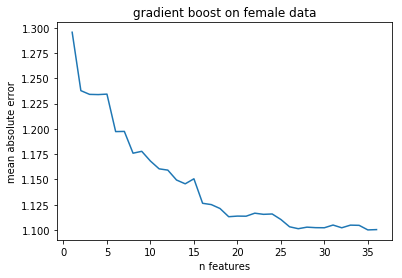

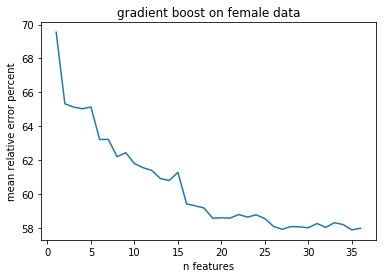

In [22]:
female_gb_rel_errors=[]
female_gb_abs_errors=[]
for i in range(1,len(features)+1):
    X_train, X_test, y_train, y_test = train_test_split(X_female[female_features[:i]], y_female, test_size=0.2, random_state=42)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    female_gb_rel_errors.append(rel_error*100)
    female_gb_abs_errors.append(abs_error)
    print(i,abs_error,rel_error*100)
    
plt.plot(range(1,len(female_features)+1),female_gb_abs_errors)
plt.xlabel('n features')
plt.ylabel('mean absolute error')
plt.title('gradient boost on female data')
plt.show()

plt.plot(range(1,len(female_features)+1),female_gb_rel_errors)
plt.xlabel('n features')
plt.ylabel('mean relative error percent')
plt.title('gradient boost on female data')
plt.show()

<h2> Age-wise data split: feature ranking, n_features vs error</h2>

In [23]:
young_features=[]
X_copy=X_young.copy()
for _ in range(n_features):
    X_reg_new = SelectKBest(score_func=f_regression, k=1).fit_transform(X_copy,y_young)
    to_comp = np.squeeze(X_reg_new)
    cols = X_young.columns
    for c in cols:
        cur_col=np.array(X_young[c])
        if np.allclose(to_comp,cur_col):
            selected_feature=c
            young_features.append(selected_feature)
            print (selected_feature,f_regression(X_young[[selected_feature]],y_young)[0])

    

    X_copy=X_copy.drop(selected_feature,axis=1)


pct_cmnty_cli_weighted [3318.92515757]
pct_self_anosmia_ageusia_weighted [2948.69825964]
pct_hh_cli_weighted [1428.53010568]
pct_hh_fever_weighted [1296.02855624]
pct_self_fever_weighted [974.5589756]
pct_hh_sore_throat_weighted [770.3940817]
pct_self_sore_throat_weighted [465.39406616]
pct_hh_shortness_of_breath_weighted [455.40303965]
pct_hh_difficulty_breathing_weighted [415.94814061]
pct_self_persistent_pain_pressure_in_chest_weighted [338.82984984]
pct_worked_outside_home_weighted [290.05845681]
pct_self_shortness_of_breath_weighted [231.29677857]
pct_self_nausea_vomiting_weighted [215.0330387]
pct_self_difficulty_breathing_weighted [209.91671484]
pct_hh_cough_weighted [206.97630749]
pct_avoid_contact_all_or_most_time_weighted [200.8853089]
pct_asthma_weighted [193.7692325]
pct_self_cough_weighted [127.22996481]
pct_self_runny_nose_weighted [109.25272831]
pct_self_diarrhea_weighted [70.22480251]
pct_no_above_medical_conditions_weighted [65.64830445]
pct_diabetes_weighted [39.95236

1 1.3724609236413612 76.06208207863962
2 1.3115972315122288 71.52034827045678
3 1.3049586024417614 71.17094516576972
4 1.3014520450062796 70.97878283898554
5 1.303619496796496 71.0909940497743
6 1.303521520951061 70.97810087268392
7 1.2996994949032878 70.97119200064155
8 1.2920516557328068 70.35817031655674
9 1.291026420777273 70.26696096439589
10 1.2954344552158636 70.57487443798294
11 1.2798832445720676 69.57853522441467
12 1.2810975977582217 69.79136495417897
13 1.2809712774159447 69.83326323965817
14 1.2808355861062182 69.86404517310474
15 1.2681909819336297 68.7840141401725
16 1.2556434975918436 68.00341784652984
17 1.2565377801611701 68.16396102978875
18 1.2581273030005022 68.27463821978098
19 1.244454236377818 67.51489834226102
20 1.2445308893294535 67.68177962870915
21 1.242678443280833 67.49896749523064
22 1.2431620141980675 67.41452164823684
23 1.2418423968877579 67.53453153071253
24 1.241472217020517 67.5062157152028
25 1.239042081112669 67.44001512286296
26 1.24007996924765

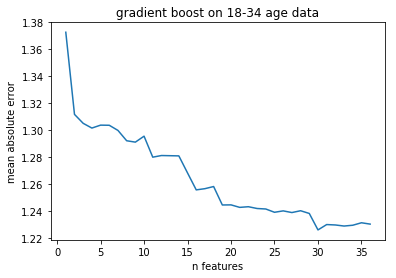

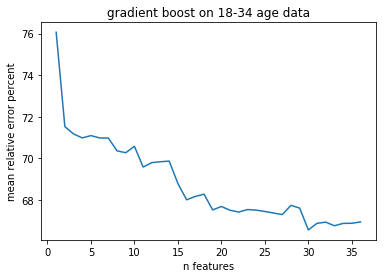

In [24]:
young_gb_rel_errors=[]
young_gb_abs_errors=[]
for i in range(1,len(features)+1):
    X_train, X_test, y_train, y_test = train_test_split(X_young[young_features[:i]], y_young, test_size=0.2, random_state=42)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    young_gb_rel_errors.append(rel_error*100)
    young_gb_abs_errors.append(abs_error)
    print(i,abs_error,rel_error*100)
    
plt.plot(range(1,len(young_features)+1),young_gb_abs_errors)
plt.xlabel('n features')
plt.ylabel('mean absolute error')
plt.title('gradient boost on 18-34 age data')
plt.show()

plt.plot(range(1,len(young_features)+1),young_gb_rel_errors)
plt.xlabel('n features')
plt.ylabel('mean relative error percent')
plt.title('gradient boost on 18-34 age data')
plt.show()

In [25]:
mid_features=[]
X_copy=X_mid.copy()
for _ in range(n_features):
    X_reg_new = SelectKBest(score_func=f_regression, k=1).fit_transform(X_copy,y_mid)
    to_comp = np.squeeze(X_reg_new)
    cols = X_mid.columns
    for c in cols:
        cur_col=np.array(X_mid[c])
        if np.allclose(to_comp,cur_col):
            selected_feature=c
            mid_features.append(selected_feature)
            print (selected_feature,f_regression(X_mid[[selected_feature]],y_mid)[0])
    

    X_copy=X_copy.drop(selected_feature,axis=1)

pct_cmnty_cli_weighted [4372.30838451]
pct_self_anosmia_ageusia_weighted [3196.31554783]
pct_hh_cli_weighted [1703.16924614]
pct_hh_fever_weighted [1545.28689647]
pct_self_fever_weighted [1181.11442529]
pct_hh_sore_throat_weighted [613.51428372]
pct_hh_difficulty_breathing_weighted [539.44569446]
pct_self_nausea_vomiting_weighted [450.43221626]
pct_hh_shortness_of_breath_weighted [399.57755292]
pct_self_persistent_pain_pressure_in_chest_weighted [395.10551402]
pct_self_runny_nose_weighted [303.46047507]
pct_self_difficulty_breathing_weighted [293.75742224]
pct_self_sore_throat_weighted [255.59325861]
pct_avoid_contact_all_or_most_time_weighted [238.00686866]
pct_self_shortness_of_breath_weighted [204.27626871]
pct_asthma_weighted [173.77418671]
pct_worked_outside_home_weighted [142.4350348]
pct_self_none_of_above_weighted [113.80583431]
pct_high_blood_pressure_weighted [112.6235206]
pct_hh_cough_weighted [93.52925827]
pct_diabetes_weighted [69.37369048]
pct_self_nasal_congestion_weight

1 1.4404617390980912 77.20782171241186
2 1.392932386846091 73.41028707681716
3 1.3894460996156501 72.9997921068835
4 1.390239286906838 72.99070929579126
5 1.3908848893622048 73.22262936412409
6 1.3757959248183171 72.63158953290089
7 1.378173321226981 72.6760111654922
8 1.3725073075178877 72.33674038099016
9 1.3609743560791263 71.64619643606801
10 1.3616538961666023 71.80874828539558
11 1.3070649268066539 67.87383109155653
12 1.3047105377508186 67.77987684745777
13 1.3065497104643526 68.07936488776589
14 1.3006532342029038 67.7115011766429
15 1.3005143681598856 67.78326472662941
16 1.3016526974541798 67.95630703787218
17 1.3031277546622222 68.09501264507522
18 1.2824434596297414 67.20250126995253
19 1.2795843011231938 67.00639383689429
20 1.2792709807410634 67.065275334206
21 1.2828911247430248 67.26918654063431
22 1.2800156091606008 67.08022483618171
23 1.2773924580920764 67.04748733044318
24 1.2754220710538453 66.9006181451184
25 1.2740277068019865 66.84655124045695
26 1.2761483447845

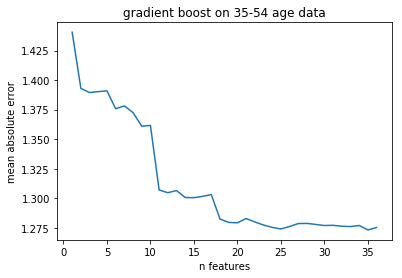

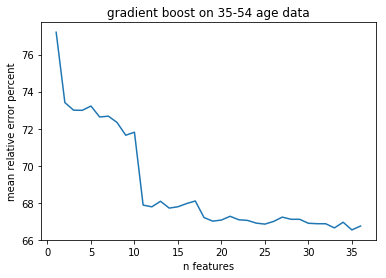

In [26]:
mid_gb_rel_errors=[]
mid_gb_abs_errors=[]
for i in range(1,len(features)+1):
    X_train, X_test, y_train, y_test = train_test_split(X_mid[mid_features[:i]], y_mid, test_size=0.2, random_state=42)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    mid_gb_rel_errors.append(rel_error*100)
    mid_gb_abs_errors.append(abs_error)
    print(i,abs_error,rel_error*100)
    
plt.plot(range(1,len(mid_features)+1),mid_gb_abs_errors)
plt.xlabel('n features')
plt.ylabel('mean absolute error')
plt.title('gradient boost on 35-54 age data')
plt.show()

plt.plot(range(1,len(mid_features)+1),mid_gb_rel_errors)
plt.xlabel('n features')
plt.ylabel('mean relative error percent')
plt.title('gradient boost on 35-54 age data')
plt.show()



In [27]:
old_features=[]
X_copy=X_old.copy()
for _ in range(n_features):
    X_reg_new = SelectKBest(score_func=f_regression, k=1).fit_transform(X_copy,y_old)
    to_comp = np.squeeze(X_reg_new)
    cols = X_old.columns
    for c in cols:
        cur_col=np.array(X_old[c])
        if np.allclose(to_comp,cur_col):
            selected_feature=c
            old_features.append(selected_feature)
            print (selected_feature,f_regression(X_old[[selected_feature]],y_old)[0])
    

    X_copy=X_copy.drop(selected_feature,axis=1)

pct_cmnty_cli_weighted [3817.82412042]
pct_hh_cli_weighted [803.5587999]
pct_hh_fever_weighted [771.84931559]
pct_self_anosmia_ageusia_weighted [739.69055057]
pct_self_fever_weighted [592.58811451]
pct_avoid_contact_all_or_most_time_weighted [429.38297358]
pct_self_runny_nose_weighted [360.59610407]
pct_worked_outside_home_weighted [241.22577998]
pct_self_none_of_above_weighted [217.82873631]
pct_high_blood_pressure_weighted [202.33200623]
pct_self_nausea_vomiting_weighted [143.29806828]
pct_self_persistent_pain_pressure_in_chest_weighted [92.12333547]
pct_asthma_weighted [90.31863097]
pct_self_nasal_congestion_weighted [83.20484474]
pct_hh_difficulty_breathing_weighted [77.57471734]
pct_self_other_weighted [72.86230174]
pct_self_multiple_symptoms_weighted [70.85295122]
pct_hh_sore_throat_weighted [69.49006658]
pct_diabetes_weighted [62.75214528]
pct_self_muscle_joint_aches_weighted [50.98048673]
pct_hh_shortness_of_breath_weighted [49.17529632]
pct_chronic_lung_disease_weighted [46.18

1 1.261819284194964 70.06915368531249
2 1.2484991250198758 69.10736105667638
3 1.2477231997051679 68.91621960321181
4 1.234691885331677 67.49164480541457
5 1.2343356199648705 67.53586026628497
6 1.194735709409407 65.4120799147281
7 1.1744678064299097 64.11604163790575
8 1.1765267680056737 64.31539708639721
9 1.173919977396793 64.1178794484923
10 1.1739680904649683 64.17123055249387
11 1.1760129136839026 64.31455312958843
12 1.1766791892234498 64.42693357732732
13 1.1791814386316888 64.43790645435303
14 1.1777619632058591 64.56164417845109
15 1.1797151489465303 64.57169853449895
16 1.1779890479388029 64.49454984724461
17 1.178932331248289 64.57186798692554
18 1.1780361062343292 64.41956320225046
19 1.1768804372997022 64.48651313473687
20 1.178059117228493 64.57301930558656
21 1.1767644362392076 64.5143754830576
22 1.1727593122666033 64.23084447378895
23 1.1733068382711678 64.24246690565185
24 1.1744302463929808 64.41606402994708
25 1.1745618469257035 64.48874191290919
26 1.1746517553005

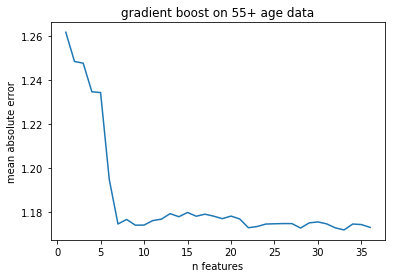

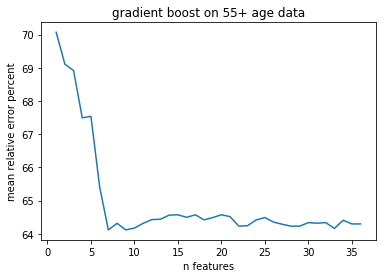

In [28]:
old_gb_rel_errors=[]
old_gb_abs_errors=[]
for i in range(1,len(features)+1):
    X_train, X_test, y_train, y_test = train_test_split(X_old[old_features[:i]], y_old, test_size=0.2, random_state=42)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    old_gb_rel_errors.append(rel_error*100)
    old_gb_abs_errors.append(abs_error)
    print(i,abs_error,rel_error*100)
    
plt.plot(range(1,len(old_features)+1),old_gb_abs_errors)
plt.xlabel('n features')
plt.ylabel('mean absolute error')
plt.title('gradient boost on 55+ age data')
plt.show()

plt.plot(range(1,len(old_features)+1),old_gb_rel_errors)
plt.xlabel('n features')
plt.ylabel('mean relative error percent')
plt.title('gradient boost on 55+ age data')
plt.show()

<h2> Confidence Intervals </h2>

In [31]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h, se

In [32]:
#entire
errors = []
abs_errors = []
for rv in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rv)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    rel_errors_entire = []
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
        rel_errors_entire.append(pct*100)
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    print(abs_error,rel_error*100)
    errors.append(rel_error*100)
    abs_errors.append(abs_error)

1.1258504774678273 59.468324321411295
1.1460067246062648 60.13095752862606
1.1343314341622317 60.2740405776871
1.1418061984339085 60.1797505573946
1.1314699982199756 60.26296657033758
1.1391873089987643 61.13078583250243
1.1489215487098072 60.59782939932895
1.131448354512022 59.49804313278142
1.153461834624955 60.31130466792401
1.1374758175147333 60.95604750162893
1.140054426195688 59.56751269840217
1.1425019279201187 61.14130140220768
1.1422977473731304 60.68321246130108
1.1349935555348072 60.46283269150388
1.1414098476138912 60.1403433473602
1.140526044515934 60.794717645410934
1.1258935570940645 59.68578561119503
1.1437670199706846 61.304030015403164
1.13708805381119 59.672795394530866
1.145947038416739 61.43929411276249


In [33]:
print (mean_confidence_interval(errors))
print( mean_confidence_interval(abs_errors))  

(60.385093773485, 60.096807085830484, 60.67338046113952, 0.13773692043688662)
(1.1392219457848367, 1.1358792820660835, 1.14256460950359, 0.0015970498340490266)


In [34]:
#male
errors = []
abs_errors = []
for rv in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_male, y_male, test_size=0.2, random_state=rv)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    rel_errors_entire = []
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
        rel_errors_entire.append(pct*100)
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    print(abs_error,rel_error*100)
    errors.append(rel_error*100)
    abs_errors.append(abs_error)

1.3831574094458243 78.73490006531286
1.3958746880245276 78.019379560997
1.4030101221236295 78.09215431050468
1.4057788208304662 78.98760514700214
1.410000478679479 76.83871745459314
1.381443038415083 79.2951285237397
1.3834312280366556 77.9775520800135
1.390562261009924 77.83210860058054
1.3501460685422193 77.5594319604867
1.3918344342088858 79.22369681474973
1.3727232176184654 78.06749208461746
1.3627240711690798 77.38090391707738
1.3901618709229675 80.876551170768
1.3610627145340495 78.31070749914986
1.3981093954459625 77.80016062635595
1.393914386633306 77.18733545382155
1.3743925959170145 76.86915704016496
1.3975714169874218 77.6248570822084
1.3961694246693641 79.51928417578863
1.3577246480214422 77.76226253230895


In [35]:
print (mean_confidence_interval(errors))
print( mean_confidence_interval(abs_errors))  

(78.19796930501205, 77.7332897368029, 78.6626488732212, 0.22201348676832394)
(1.3849896145617886, 1.3770649375130268, 1.3929142916105504, 0.0037862331453243844)


In [36]:
#female
errors = []
abs_errors = []
for rv in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_female, y_female, test_size=0.2, random_state=rv)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    rel_errors_entire = []
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
        rel_errors_entire.append(pct*100)
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    print(abs_error,rel_error*100)
    errors.append(rel_error*100)
    abs_errors.append(abs_error)

1.089365402979862 57.47710889042848
1.0828812171835802 58.23717089636502
1.0842390879615142 56.07491165841149
1.1086385338272795 58.94736919804625
1.1077367340468207 57.61687897176382
1.0764486452362645 55.20019669872044
1.099955616786719 56.5534574070885
1.097080323326607 56.8627039216569
1.1181769681948712 56.66854015198912
1.1146591979854694 57.39426277065524
1.1150172310654172 56.837630096589855
1.0838938805310903 56.72858350346151
1.115728647462206 57.364784658423474
1.094742500485029 56.27395905509961
1.0806702597077629 56.78996685598443
1.111639174033212 56.377726788591566
1.1135941022051086 56.564826207804266
1.1054566446107181 57.918151575097944
1.0729557443205306 55.52900374368358
1.081276646826254 56.01543233077214


In [37]:
print (mean_confidence_interval(errors))
print( mean_confidence_interval(abs_errors))  

(56.87163326903169, 56.44841011249154, 57.294856425571844, 0.20220654208382177)
(1.097707827938816, 1.0906197602680803, 1.1047958956095516, 0.0033865199283337898)


In [38]:
#young
errors = []
abs_errors = []
for rv in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_young, y_young, test_size=0.2, random_state=rv)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    rel_errors_entire = []
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
        rel_errors_entire.append(pct*100)
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    print(abs_error,rel_error*100)
    errors.append(rel_error*100)
    abs_errors.append(abs_error)

1.2403293356320002 66.55722991262894
1.2282039897566612 67.1278736193008
1.2209921918776727 67.49294775231368
1.231656859235095 65.68916225828943
1.223725709818322 64.62986387619293
1.2366641858888756 63.2974834597965
1.209977143863436 66.58869422875482
1.2836771825452233 68.03024322746307
1.2293230948207348 65.51356993955643
1.255418287013401 67.04542430039801
1.2468717494964214 65.85875989206829
1.2187330426781158 63.35943532015001
1.2423215418160218 67.38405089608594
1.2176232749071072 68.01901683279196
1.2085630146457684 67.13530044241038
1.2135980428424042 65.81111123634544
1.222414058080688 65.51371194308383
1.2397260934642336 70.38632262246361
1.2205993765332 65.19562059576418
1.2322271651141254 67.74771688018949


In [39]:
print (mean_confidence_interval(errors))
print( mean_confidence_interval(abs_errors))  

(66.41917696180239, 65.63854736802463, 67.19980655558015, 0.3729673302767949)
(1.2311322670014755, 1.222905118345395, 1.239359415657556, 0.003930747302570503)


In [40]:
#mid
errors = []
abs_errors = []
for rv in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.2, random_state=rv)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    rel_errors_entire = []
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
        rel_errors_entire.append(pct*100)
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    print(abs_error,rel_error*100)
    errors.append(rel_error*100)
    abs_errors.append(abs_error)

1.2867410892956026 67.34140698873603
1.2746568694526956 68.03731864082538
1.2906853807390015 68.7817935985823
1.2509734343595231 67.85723603330601
1.3077331744876428 68.13255722356024
1.3050510035683065 65.45561944032796
1.2915483335970663 68.82278216619369
1.2695425360817874 66.3594145330629
1.299854661561462 69.2614630909271
1.3252947152873156 68.61127458054503
1.2792357302951485 67.24588196985862
1.266270528688429 66.80648697950666
1.2878139411049327 67.47173759682923
1.2775299213212106 66.6487143816784
1.2787548391650414 67.17779438647972
1.3024570912273044 67.69152562888725
1.2913852238707495 66.72140076509548
1.3128877365299523 67.5675023823575
1.3015270518774553 67.83911467338967
1.2923164495463955 67.99615203415868


In [41]:
print (mean_confidence_interval(errors))
print( mean_confidence_interval(abs_errors))  

(67.5913588547154, 67.15828414138645, 68.02443356804434, 0.20691339519812268)
(1.289612985602851, 1.2813964249561505, 1.2978295462495517, 0.0039256885889080275)


In [42]:
#old
errors = []
abs_errors = []
for rv in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_old, y_old, test_size=0.2, random_state=rv)
    reg = GradientBoostingRegressor()
    reg = reg.fit(X_train,y_train)
    y_pred= reg.predict(X_test)
    yp_l=list(y_pred)
    yt_l=list(y_test)
    pct_sm=0
    abs_sum = 0
    rel_errors_entire = []
    for j in range(len(y_pred)):
        diff=abs(yp_l[j]-yt_l[j])
        abs_sum += diff
        pct= diff/(yt_l[j]+1)
        pct_sm+= pct
        rel_errors_entire.append(pct*100)
    rel_error=pct_sm/len(y_pred)
    abs_error = abs_sum/len(y_pred)
    print(abs_error,rel_error*100)
    errors.append(rel_error*100)
    abs_errors.append(abs_error)

1.1997038039596815 65.47659778325252
1.20359679902714 63.622391196906804
1.211221804971327 66.70086462949462
1.1773913881926272 66.14482195024088
1.1769393633202745 65.47583156185833
1.179083678430926 65.51487627603684
1.1999143466926283 67.65936555872794
1.2101163345220436 66.24260509563624
1.174681574687664 65.42185992161048
1.2058423817629065 67.63787772684763
1.185225547110263 67.9283457215336
1.1829622859823072 66.25851164114309
1.1959703555346144 67.91147235012349
1.1815146647820396 66.36699237786793
1.246321264247112 66.55704689427779
1.1989399510598522 66.52524473676382
1.2130682368967585 66.0920677751097
1.218572847831309 65.69482825578385
1.1810012167169175 66.8037438039201
1.204880845443521 64.52002176609952


In [43]:
print (mean_confidence_interval(errors))
print( mean_confidence_interval(abs_errors))  

(66.22776835116176, 65.71464806836056, 66.74088863396295, 0.24515737490951345)
(1.1973474345585957, 1.1889136199455514, 1.20578124917164, 0.004029487666556557)


<h2> plot combined graph </h2> 

In [44]:
all_error=[70.83696620451401 ,67.80492503904468 ,67.14871707663103 ,67.18744157135723 ,67.16200303621977 ,65.84903723570177 ,64.36469709878692 ,64.28805580492453 ,64.25829387693898 ,61.90471713882282 ,61.66433645306908 ,61.544946589702185 ,61.52693424299138 ,61.454038797524035 ,61.46579989446561 ,61.52545069566092 ,61.49639925430231 ,61.355646346051074 ,60.88954411152556 ,60.86201021324119 ,60.83805217305458 ,60.797229032439716 ,60.76188328359897 ,60.84013075850601 ,60.82307622967659 ,60.81452990098961 ,60.823572689879434 ,60.73696713532174 ,60.73697310023901 ,60.68505060692119 ,60.69900819304055 ,60.482821827379965 ,60.52561650888562 ,60.473091237337826 ,60.42256879339782 ,60.44728227875144]
male_error=[86.14274769393134, 82.58669649781739, 81.90564010050754, 81.76646979126261, 81.96268174035602, 78.903105050701, 78.52345590511997, 78.58981575593774, 78.44701730459937, 78.52220956615923, 77.71974615227944, 77.68242085417435, 77.6653681252333, 77.76819812960778, 77.87045332973197, 77.84536927741755, 77.88840825578184, 77.69002364999952, 77.89994200774089, 78.02913973225071, 78.13305970876841, 78.00672111305953, 78.15660230067752, 78.22294617169919, 78.20838406984907, 78.06286482897184, 77.48542169668042, 77.60302932699535, 77.48248203967405, 77.56010916212877, 77.32041263498199, 77.48669184772798, 77.46162494891611, 77.42022557268528, 77.49196306461424, 77.64705193776827]
female_error=[69.54484214042775, 65.31749486965755, 65.1292538738487, 65.01696500740151, 65.1297569436514, 63.21602019261881, 63.21243810643642, 62.12267377823989, 62.331480570708564, 61.94498363759999, 61.508559605866076, 61.370670080313786, 60.82254298396196, 60.85296079578716, 61.36581549929973, 59.40493713411078, 59.32789644153507, 59.10473854133769, 58.57865807164481, 58.60726911877645, 58.543960180101315, 58.800929476499334, 58.627209905129384, 58.791034138915464, 58.66058357559313, 57.99889681921792, 57.978775696994425, 57.87138607188297, 58.0102234368625, 57.964978811468036, 58.30957785516229, 58.02849587619625, 58.352026096896935, 58.04968613322698, 57.995355116893755, 57.96248727237396]
young_error=[76.06208207863962 ,71.5126542760408 ,71.16526730897493 ,70.97017343802014 ,71.0881235006338 ,70.9655536426594 ,70.96772960419828 ,70.36091999437504 ,70.27283115371552 ,70.56584396926627 ,69.59641075861477 ,69.75679712441568 ,69.81899698551774 ,69.86846573074371 ,68.79030471880331 ,68.01752928033345 ,68.19588622046854 ,68.28492255978819 ,67.55187466746615 ,67.66735860306672 ,67.45616679317712 ,67.48921611689832 ,67.4908152709273 ,67.52985634694801 ,67.43841599188652 ,67.37335761450146 ,67.29177037555733 ,67.76042688625307 ,67.64171522426611 ,66.50125124723687 ,66.88117037431259 ,66.92047558823867 ,66.79860742974422 ,66.84370202758831 ,66.89567864164006 ,66.97579634284686 ]
mid_error=[77.20782171241186 ,73.40990810945293 ,73.05233206629268 ,72.99173141926538 ,73.22205109262735 ,72.62478192730481 ,72.6549965851272 ,72.36582722748278 ,71.65099405566602 ,71.79428535474777 ,67.96469210891304 ,67.76969337780633 ,68.04334532162997 ,67.72699954853421 ,67.78693490490959 ,67.98100776379573 ,68.07104154661013 ,67.16632042498406 ,67.06933930051265 ,67.07169109648564 ,67.24155357142253 ,67.01090369000447 ,66.7755822512567 ,67.00514780761071 ,67.0680054688198 ,67.09437066668161 ,67.08834742579978 ,66.98579170833021 ,67.00374310061909 ,66.79393730720881 ,67.07070731950152 ,66.81038624669374 ,66.54073029581691 ,66.91066894386701 ,66.50326648455611 ,66.97047143526952]
old_error=[ 70.06915368531249,  69.06045818978748,  68.90552486027545,  67.47942134591032,  67.53612375470497,  65.40830872909994,  64.12575490968452,  64.31014339522598,  64.11882155830429,  64.17107997350216,  64.34756682256261,  64.44944427041571,  64.44103426527731,  64.58311691314711,  64.54997931834873,  64.47684642832667,  64.52405137548747,  64.43546613715483,  64.48833137299545,  64.54521273299677,  64.47764958142224,  64.25014844358616,  64.2897442732202,  64.44069641245156,  64.56125120688165,  64.33746133662522,  64.2939623350239,  64.24028728213136,  64.23583413916049,  64.33758849350806,  64.35445957687811,  64.36836373560683,  64.21668454854165,  64.31104207186672,  64.28646210092587,  64.30459696472715]
feat_len = [1+i for i in range(len(all_error))]

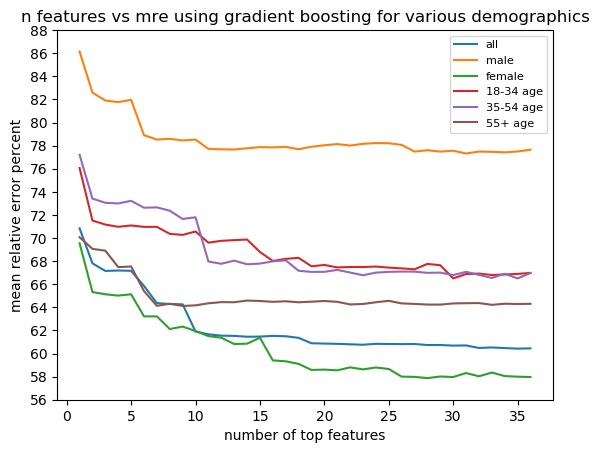

In [45]:
#plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update(plt.rcParamsDefault)
plt.plot(feat_len,all_error)
plt.plot(feat_len,male_error)
plt.plot(feat_len,female_error)
plt.plot(feat_len,young_error)
plt.plot(feat_len,mid_error)
plt.plot(feat_len,old_error)
plt.xlabel('number of top features')
plt.ylabel('mean relative error percent')
plt.title('n features vs mre using gradient boosting for various demographics')
plt.yticks(range(56,90,2)) 
plt.legend(['all','male','female','18-34 age','35-54 age','55+ age'], prop={'size': 8.1})
#plt.ylim(ymin* 0.9, ymax *1.2)

In [46]:
features

['pct_cmnty_cli_weighted',
 'pct_self_anosmia_ageusia_weighted',
 'pct_hh_cli_weighted',
 'pct_hh_fever_weighted',
 'pct_self_fever_weighted',
 'pct_hh_sore_throat_weighted',
 'pct_avoid_contact_all_or_most_time_weighted',
 'pct_hh_difficulty_breathing_weighted',
 'pct_self_persistent_pain_pressure_in_chest_weighted',
 'pct_self_runny_nose_weighted',
 'pct_worked_outside_home_weighted',
 'pct_self_nausea_vomiting_weighted',
 'pct_hh_shortness_of_breath_weighted',
 'pct_self_sore_throat_weighted',
 'pct_self_difficulty_breathing_weighted',
 'pct_asthma_weighted',
 'pct_self_shortness_of_breath_weighted',
 'pct_hh_cough_weighted',
 'pct_self_none_of_above_weighted',
 'pct_self_diarrhea_weighted',
 'pct_chronic_lung_disease_weighted',
 'pct_cancer_weighted',
 'pct_self_other_weighted',
 'pct_self_tiredness_or_exhaustion_weighted',
 'pct_self_cough_weighted',
 'pct_no_above_medical_conditions_weighted',
 'pct_heart_disease_weighted',
 'pct_multiple_medical_conditions_weighted',
 'pct_autoi